In [1]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [3]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS 

In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [5]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64 (16 neurons)
Processing hyper voxel : 20/64 (16 neurons)
Processing hyper voxel : 17/64 (16 neurons)
Processing hyper voxel : 5/64 (14 neurons)
Processing hyper voxel : 16/64 (14 neurons)
Processing hyper voxel : 4/64 (12 neurons)
Processing hyper voxel : 1/64 (11 neurons)
Processing hyper voxel : 0/64 (9 neurons)
Processing hyper voxel : 25/64 (5 neurons)
Processing hyper voxel : 32/64 (5 neurons)
Processing hyper voxel : 33/64 (5 neurons)
Processing hyper voxel : 36/64 (5 neurons)
Processing hyper voxel : 6/64 (4 neurons)
Processing hyper voxel : 22/64 (4 neurons)
Processing hyper voxel : 24/64 (3 neurons)
Processing hyper voxel : 37/64 (3 neurons)
Processing hyper voxel : 48/64 (1 neurons)
Processing hyper voxel : 26/64 (1 neurons)
Processing hyper voxel : 8/64 (1 neurons)
Processing hyper voxel : 52/64 (1 neurons)


In [6]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 3954 out of total 3954 synapses
Read 14 out of total 14 gapJunctions


Compile neuron modules

In [7]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks``` folder:
```
mpiexec python3 ../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [8]:
pps.run_sim(gaba_rev=GABA_rev)

Loading 16 neurons with 211 synapses and 8 gap junctions
numprocs=1


/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:73: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '


Setting GABA reversal potential to -60.0 mV
Current injection to 8 at 0.5 s
Current injection to 15 at 1.0 s
Running simulation for 1.5 s
1% done. Elapsed: 3.2 s, estimated time left: 317.4 s
37% done. Elapsed: 105.5 s, estimated time left: 179.7 s
72% done. Elapsed: 207.7 s, estimated time left: 80.8 s
99% done. Elapsed: 286.3 s, estimated time left: 2.9 s
Simulation run time: 289.2 s
Writing network output to networks/pair_pulse_simulation/simulation/network-output.hdf5
Saving voltage data...
Sorting spikes
Saving spike data...


Plot results

Loading 16 neurons with 211 synapses and 8 gap junctions
Loading networks/pair_pulse_simulation/simulation/network-output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.001063660206903308
Max amp: 0.0051554153252547225
Mean amp: 0.002547837664646127 +/- 0.0013517085331315353
Amps: [0.00257554 0.00215094 0.00106366 0.00175368 0.00117205 0.00515542
 0.00423824 0.00227317]


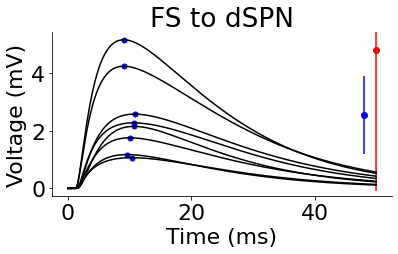

<Figure size 432x288 with 0 Axes>

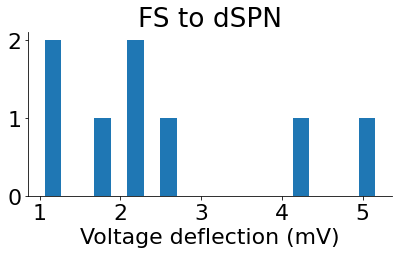

<Figure size 432x288 with 0 Axes>

In [9]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 211 synapses and 8 gap junctions
Loading networks/pair_pulse_simulation/simulation/network-output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.0006408305023714866
Max amp: 0.005350778870889555
Mean amp: 0.003192867234458784 +/- 0.0017526429920093466
Amps: [0.00124288 0.00535078 0.00064083 0.00350711 0.00210575 0.00519408
 0.00430864]


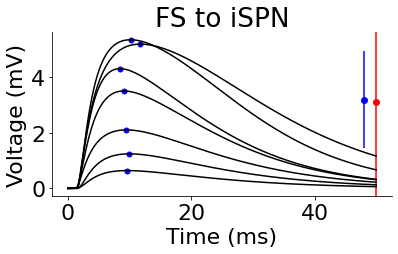

<Figure size 432x288 with 0 Axes>

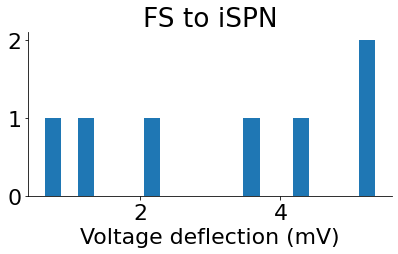

<Figure size 432x288 with 0 Axes>

In [ ]:
pps.analyse(post_type="iSPN")